In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

Axes(0.125,0.125;0.775x0.755)


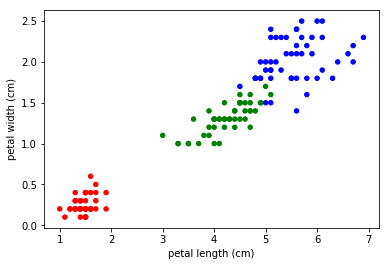

In [3]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {0: 'r', 1: 'g', 2: 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[(x)])
print (irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget))

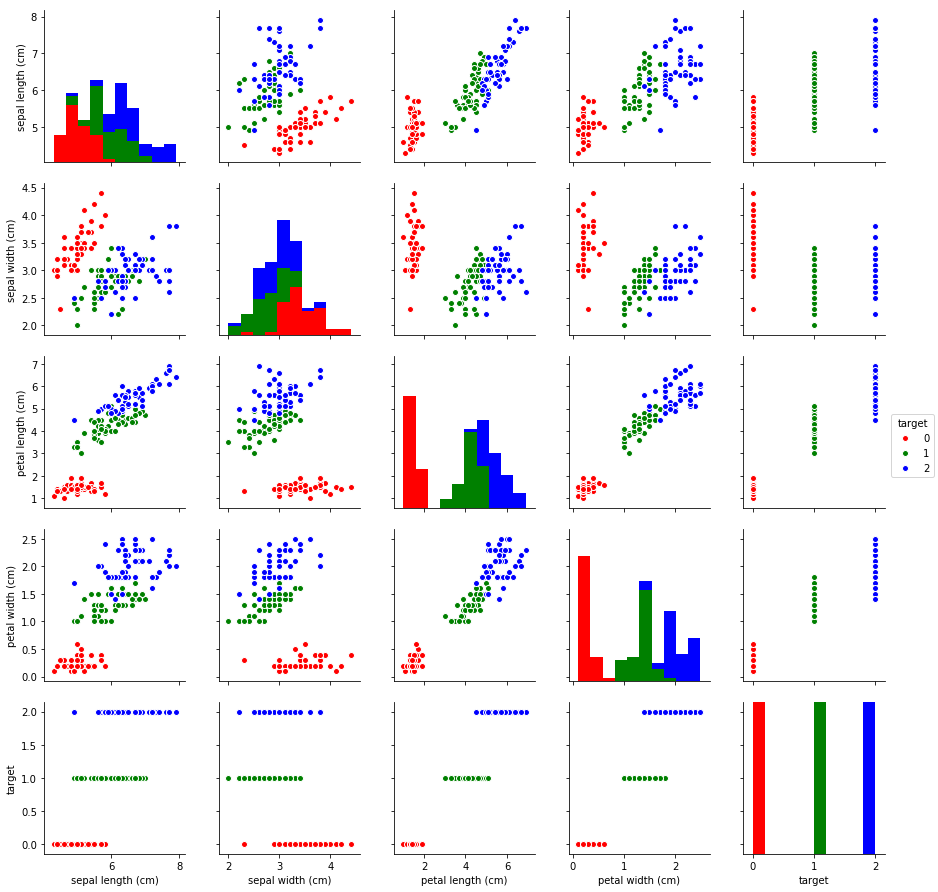

In [4]:
sns.pairplot(data=irisdf, hue='target', palette=cmap)

In [5]:
irisdf.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'ctarget'],
      dtype='object')

In [6]:
irisdf['petal length (cm)'].values

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1,  6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,
        5.1,  5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,
        4.9,  6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,
        5.6,  5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,
        5.9,  5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

Axes(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


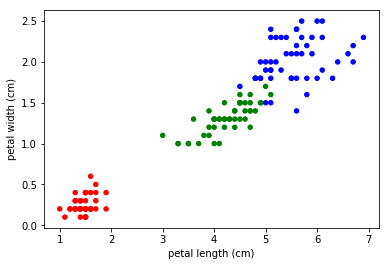

In [7]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
print (irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget))
print (irisdf.describe())

#buiding a simple classifier.  if petal lenght is less than 2, return 0, else return 1
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)  #output of this function is going to be 0 or 1

In [8]:
predictions

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int64

In [9]:
irisdf['predictions'] = predictions

print (float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)) #outputting values of irisdf where the condition ([irisdf.target == irisdf.predictions]) is satisfied

0.6666666666666666


In [10]:
(irisdf.predictions == irisdf.target).sum()/float(len(irisdf)) #len(irisdf) indicates the number of observations

0.66666666666666663

### Starter Code

Work on improving the classifier below.

In [11]:
def my_classifier(row):
    if (row['petal length (cm)'] < 2) and (row['petal width (cm)'] < 0.7):  #adding another variable
        return 0
    elif (row['petal length (cm)'] < 4.9) and (row['petal width (cm)'] < 1.8): #adding another variable
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print (float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

0.96


### Using distance: KNN implementation

In [29]:
irisdf[['petal length (cm)', 'petal width (cm)']].head() # choosing 2 columns length and width

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
cols_to_keep = ['petal length (cm)', 'petal width (cm)']

In [36]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

#iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(irisdf[cols_to_keep], irisdf.target)
#print (knn.predict(iris.data[cols_to_keep]))
#print (irisdf.target)


print (knn.score(irisdf[cols_to_keep], irisdf.target))

0.96


Do we see a change in performance when using the distance weight?

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [47]:
import numpy as np
list(range(1,20))  # enclose range in list bracket because it is how it's done in python 3

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [52]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
params = {'n_neighbors': list(range(1,30)), 'weights': ['distance']}
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

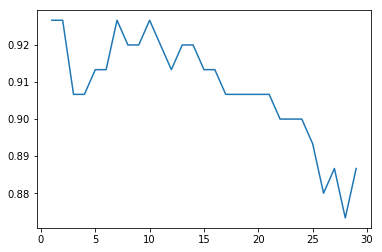

In [51]:
# visualize performance
k = list(range(1, 30))
plt.plot(k,[s[1] for s in  gs.grid_scores_],)  #plotting the accuracy for different values of k